In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# Import Dataset

In [2]:
train = pd.read_csv('data/train.csv')
test =  pd.read_csv('data/test.csv')

In [3]:
y_train = train["label"]
x_train_set = train.drop(labels="label", axis=1)
del train #frees space

# Data Manipulation

In [4]:
#Normalize
x_train_set/=255.0
test/=255.0
#Reshape
x_train_set = tf.reshape(x_train_set,[-1,28,28,1])
test = tf.reshape(test,[-1,28,28,1])

x_train, x_val = x_train_set[:38000],x_train_set[38000:]
y_train, y_val = y_train[:38000],y_train[38000:]
print(x_train.shape)
print(y_train.shape)

(38000, 28, 28, 1)
(38000,)


# Define Model

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                                 activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model

In [6]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Fitting The Data

In [7]:
history = model.fit(x=x_train,y = y_train, batch_size=80,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
475/475 [==============================] - 3s 7ms/step - loss: 0.2389 - accuracy: 0.9230 - val_loss: 0.0497 - val_accuracy: 0.9837
Epoch 2/20
475/475 [==============================] - 3s 7ms/step - loss: 0.0731 - accuracy: 0.9780 - val_loss: 0.0412 - val_accuracy: 0.9868
Epoch 3/20
475/475 [==============================] - 3s 7ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0320 - val_accuracy: 0.9893
Epoch 4/20
475/475 [==============================] - 3s 7ms/step - loss: 0.0462 - accuracy: 0.9863 - val_loss: 0.0315 - val_accuracy: 0.9898
Epoch 5/20
475/475 [==============================] - 3s 7ms/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 0.0254 - val_accuracy: 0.9910
Epoch 6/20
475/475 [==============================] - 3s 6ms/step - loss: 0.0365 - accuracy: 0.9893 - val_loss: 0.0252 - val_accuracy: 0.9910
Epoch 7/20
475/475 [==============================] - 3s 7ms/step - loss: 0.0333 - accuracy: 0.9904 - val_loss: 0.0299 - val_accuracy: 0.9908
Epoch 

# Predicting the test data

[[1.6950201e-08 1.8800494e-08 9.9999833e-01 4.6847543e-08 4.7756741e-09
  2.6903802e-13 7.3780176e-11 1.6213301e-06 2.2697716e-08 1.0516628e-09]]
[[9.9999321e-01 1.5104309e-10 6.4452706e-08 8.6388967e-09 3.7194359e-09
  3.7006592e-07 5.7604102e-06 2.5637567e-08 1.5827362e-07 2.7100481e-07]]
[[3.0276515e-16 3.5235319e-15 4.6525440e-15 1.1227140e-15 3.4563178e-07
  3.1741623e-16 2.9344274e-20 3.4568643e-11 8.0639895e-10 9.9999964e-01]]


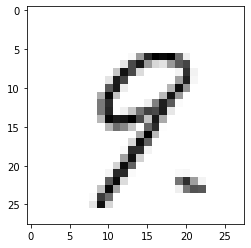

In [9]:
a = tf.reshape(test[0],[1,28,28,1])
b = tf.reshape(test[1],[1,28,28,1])
c = tf.reshape(test[2],[1,28,28,1])
print(model.predict(a))
print(model.predict(b))
print(model.predict(c))
a = tf.reshape(a,[28,28])
b = tf.reshape(b,[28,28])
c = tf.reshape(c,[28,28])
plt.imshow(a,cmap="binary")
plt.imshow(b,cmap="binary")
plt.imshow(c,cmap="binary")
plt.show()

In [10]:
test_labels = model.predict(test)

# Saving The Predictions

In [11]:
results = np.argmax(test_labels,axis=1)

In [12]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [13]:
results = pd.Series(results,name="Label")
print(len(results))

28000


In [14]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("predictions.csv",index=False)